In [200]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier



In [201]:
# Load the dataset
df = pd.read_csv('data.csv')

# Display the first few rows to understand its structure
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [202]:
# Get a summary of the numerical columns in the dataset
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [203]:
#dataset shape
df.shape

(569, 33)

In [204]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

C:\Users\fella\AppData\Local\Temp\ipykernel_17032\1400309868.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diagnosis', data=df, palette='Set2')


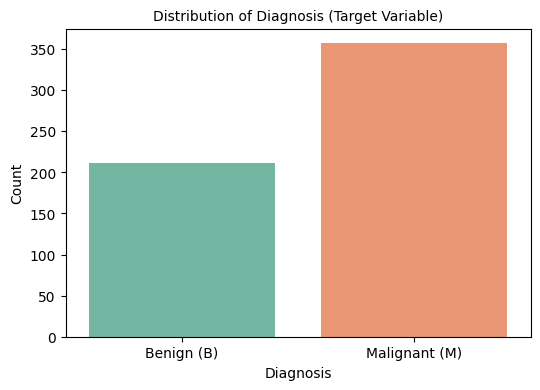

In [206]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='diagnosis', data=df, palette='Set2')
plt.title('Distribution of Diagnosis (Target Variable)', fontsize=10)
plt.xlabel('Diagnosis', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.xticks(ticks=[0, 1], labels=['Benign (B)', 'Malignant (M)'], fontsize=10)
plt.show()


In [207]:
#Preprocessing
#Drop unnecessary columns  
df = df.drop(columns=['id'])

In [208]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [209]:
#Encode the target variable
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [210]:
# Check for missing values (NaN) and infinite values
print("Checking for missing values:")
print(df.isna().sum())  # Sum of NaN values in each column

Checking for missing values:
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 3

In [211]:
# Drop the column with all missing values
df.drop(columns=['Unnamed: 32'], inplace=True)

In [212]:
#Separate features and target variable
X = df.drop(columns=['diagnosis']) #Features
y = df['diagnosis'] #Target

In [213]:
# Scale the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

In [214]:
# Create a scaled DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=X.columns)
print("\nScaled Data:")
scaled_df.head()


Scaled Data:


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [215]:
scaled_df.shape

(569, 30)

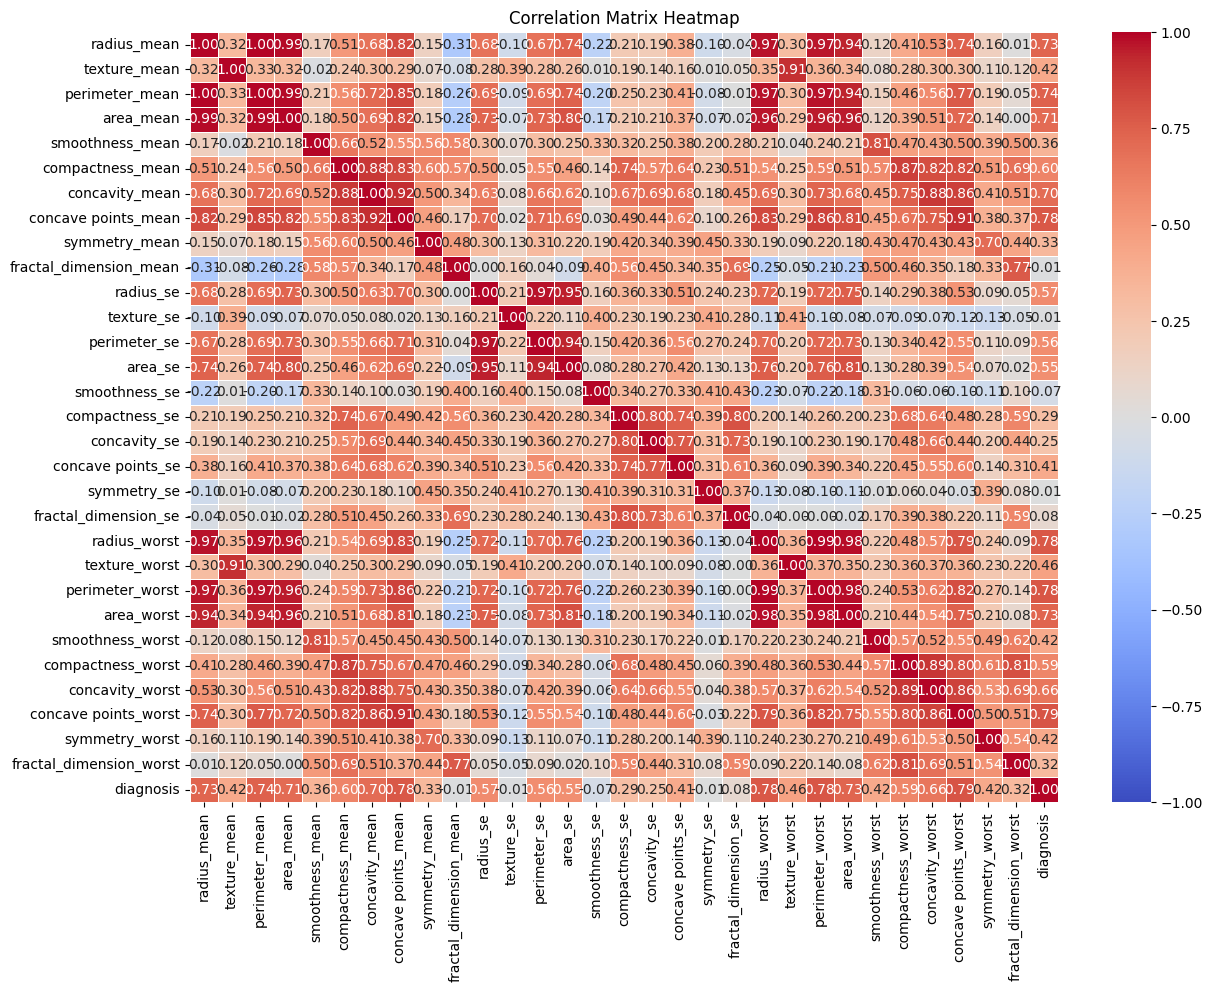

In [216]:
# Correlation matrix
# Add the target back to the scaled DataFrame for correlation analysis
scaled_df['diagnosis'] = y

# Calculate the correlation matrix
correlation_matrix = scaled_df.corr()

# Plot the correlation matrix with a color heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()


In [217]:
# Remove Unmeaningful Features
# Threshold for high correlation (e.g., correlation greater than 0.9 or less than -0.9)
threshold = 0.8

# Find features that are highly correlated with each other
correlation_matrix = scaled_df.corr()

# Identify features with correlation higher than the threshold
correlation_matrix_abs = correlation_matrix.abs()

# Create a mask for upper triangle of the correlation matrix to avoid duplicate checks
mask = np.triu(np.ones_like(correlation_matrix_abs, dtype=bool))

# Get the pairs of highly correlated features
high_correlation_pairs = []

for i in range(len(correlation_matrix_abs.columns)):
    for j in range(i):
        if correlation_matrix_abs.iloc[i, j] > threshold:
            high_correlation_pairs.append((correlation_matrix_abs.columns[i], correlation_matrix_abs.columns[j]))

print(f"Highly correlated pairs (correlation > {threshold}):")
for pair in high_correlation_pairs:
    print(pair)

# Remove features with high correlation
# We will keep the feature with the higher correlation to 'diagnosis'
remove_features = set()

for pair in high_correlation_pairs:
    feature_1 = pair[0]
    feature_2 = pair[1]

    # Check the correlation of both features with 'diagnosis'
    correlation_1 = correlation_matrix[feature_1]['diagnosis']
    correlation_2 = correlation_matrix[feature_2]['diagnosis']

    # Keep the feature with the higher correlation to 'diagnosis'
    if abs(correlation_1) > abs(correlation_2):
        remove_features.add(feature_2)
    else:
        remove_features.add(feature_1)

print(f"Features to be removed due to high correlation: {remove_features}")

# Drop the identified features
X_filtered = X.drop(columns=remove_features)

# Check the resulting features after filtering
print("Remaining features after filtering:")
print(X_filtered.columns)


Highly correlated pairs (correlation > 0.8):
('perimeter_mean', 'radius_mean')
('area_mean', 'radius_mean')
('area_mean', 'perimeter_mean')
('concavity_mean', 'compactness_mean')
('concave points_mean', 'radius_mean')
('concave points_mean', 'perimeter_mean')
('concave points_mean', 'area_mean')
('concave points_mean', 'compactness_mean')
('concave points_mean', 'concavity_mean')
('perimeter_se', 'radius_se')
('area_se', 'area_mean')
('area_se', 'radius_se')
('area_se', 'perimeter_se')
('concavity_se', 'compactness_se')
('fractal_dimension_se', 'compactness_se')
('radius_worst', 'radius_mean')
('radius_worst', 'perimeter_mean')
('radius_worst', 'area_mean')
('radius_worst', 'concave points_mean')
('texture_worst', 'texture_mean')
('perimeter_worst', 'radius_mean')
('perimeter_worst', 'perimeter_mean')
('perimeter_worst', 'area_mean')
('perimeter_worst', 'concave points_mean')
('perimeter_worst', 'radius_worst')
('area_worst', 'radius_mean')
('area_worst', 'perimeter_mean')
('area_worst

In [218]:
# Check how many features remain after filtering
print(f"Number of features remaining: {X_filtered.shape[1]}")

Number of features remaining: 12


In [219]:
X_filtered.head()

,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concave points_se,symmetry_se,texture_worst,smoothness_worst,concave points_worst,symmetry_worst
0,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.01587,0.03003,17.33,0.1622,0.2654,0.4601
1,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01340,0.01389,23.41,0.1238,0.1860,0.2750
2,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.02058,0.02250,25.53,0.1444,0.2430,0.3613
3,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.01867,0.05963,26.50,0.2098,0.2575,0.6638
4,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.01885,0.01756,16.67,0.1374,0.1625,0.2364


In [220]:
# Split the data into trainadn test

# Split the data into features (X) and target (y)
X = X_filtered  # Features
y = df['diagnosis']  # Target (diagnosis)

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the splits
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")


Training set size: 455 samples
Test set size: 114 samples


In [221]:
X_train.head()

,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concave points_se,symmetry_se,texture_worst,smoothness_worst,concave points_worst,symmetry_worst
68,0.2111,0.08046,0.3274,1.1940,0.009549,0.08606,0.033220,0.04197,22.65,0.14820,0.17500,0.4228
181,0.2395,0.07398,0.6298,0.7629,0.004253,0.04759,0.015670,0.01798,33.48,0.14910,0.29030,0.4098
63,0.2341,0.06963,0.4098,2.2650,0.008738,0.03938,0.015600,0.04192,19.23,0.09836,0.05087,0.3282
248,0.1897,0.06329,0.2497,1.4930,0.007189,0.01035,0.006245,0.02158,35.19,0.14990,0.06136,0.3409
60,0.2743,0.06960,0.5158,1.4410,0.007514,0.01099,0.008193,0.04183,17.45,0.12750,0.02579,0.3557


**1 - Supervised Learning (Logistic Regression, Random Forest, KNN)**

In [222]:
#Logistic Regression
# Initialize the Logistic Regression model with increased max_iter and 'liblinear' solver
logreg_model = LogisticRegression(max_iter=200, solver='liblinear')

# Train the model
logreg_model.fit(X_train, y_train)

# Predict on the test set
y_pred_logreg = logreg_model.predict(X_test)


In [223]:
#Random Forest

# Initialize the model
rf_model = RandomForestClassifier()

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)


In [224]:
#KNN

# Initialize the KNN model (you can tune n_neighbors as needed)
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_model.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn_model.predict(X_test)


**Evaluation of All Models** 

In [225]:
from sklearn.metrics import classification_report
#Classification Report for Each Model

# Classification report for KNN
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

# Classification report for Random Forest
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Classification report for Logistic Regression
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))


KNN Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.86      0.84        71
           1       0.74      0.67      0.71        43

    accuracy                           0.79       114
   macro avg       0.78      0.77      0.77       114
weighted avg       0.79      0.79      0.79       114

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94        71
           1       0.93      0.88      0.90        43

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95        71
           1       0.97      0.86      0.91        43

    accuracy                           0.94       114
   macro avg       0.

**Compare Performance of the Models**

In [226]:
# Accuracy comparison
print(f"KNN Accuracy: {accuracy_knn:.4f}")
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print(f"Logistic Regression Accuracy: {accuracy_logreg:.4f}")


KNN Accuracy: 0.9561
Random Forest Accuracy: 0.9649
Logistic Regression Accuracy: 0.9561


**Unsupervised Learning (K-Means Clustering, Hierarchical Clustering (Agglomerative Clustering), GMM)**

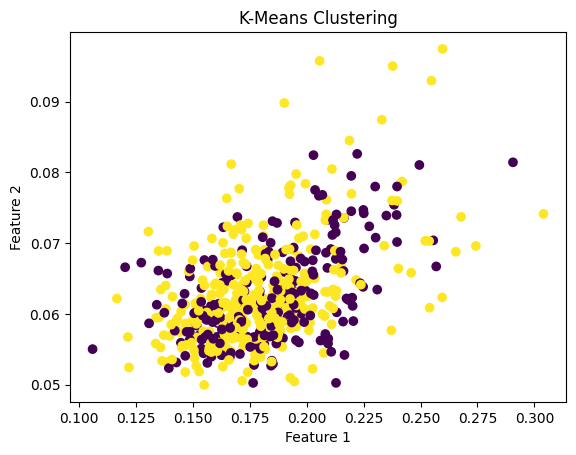

In [228]:
# K-Means Clustering

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming X is a pandas DataFrame
# Convert to numpy array if needed
X = X.to_numpy()

# Initialize the K-Means model
kmeans = KMeans(n_clusters=2, random_state=42)

# Fit the model to the data
kmeans.fit(X)

# Predict the cluster labels
y_pred_kmeans = kmeans.predict(X)

# Plot the clusters (assuming X has at least 2 features for plotting)
plt.scatter(X[:, 0], X[:, 1], c=y_pred_kmeans, cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


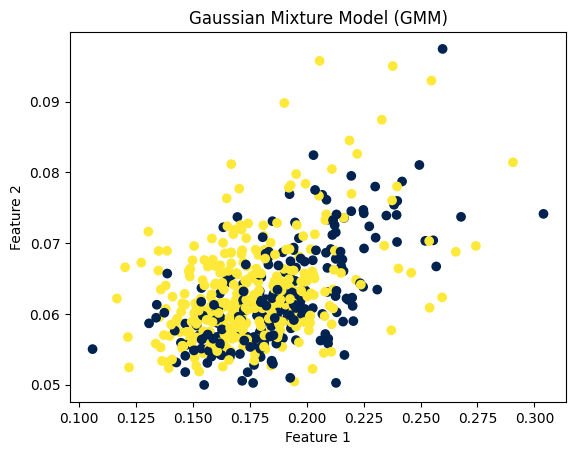

In [229]:
# Gaussian Mixture Model (GMM)
from sklearn.mixture import GaussianMixture

# Initialize the Gaussian Mixture Model with 2 components (clusters)
gmm = GaussianMixture(n_components=2, random_state=42)

# Fit the model to the data
gmm.fit(X)

# Predict the cluster labels for each data point
y_pred_gmm = gmm.predict(X)

# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=y_pred_gmm, cmap='cividis')
plt.title('Gaussian Mixture Model (GMM)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()



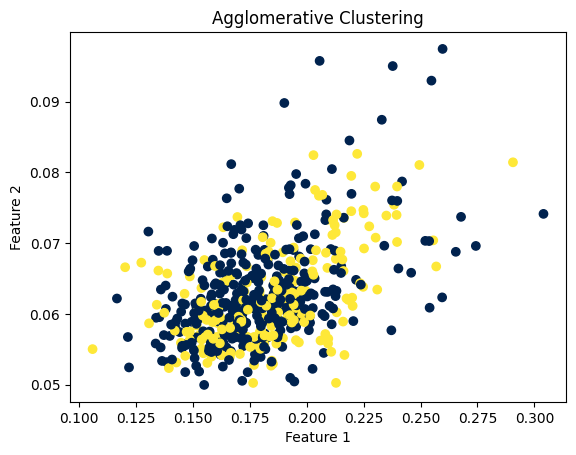

In [230]:
# Hierarchical Clustering (Agglomerative Clustering)

from sklearn.cluster import AgglomerativeClustering

# Initialize the Agglomerative Clustering model
hierarchical = AgglomerativeClustering(n_clusters=2)

# Fit the model to the data
y_pred_hierarchical = hierarchical.fit_predict(X)

# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=y_pred_hierarchical, cmap='cividis')
plt.title('Agglomerative Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [231]:
# Silhouette score for K-Means
silhouette_kmeans = silhouette_score(X, y_pred_kmeans)
print(f"Silhouette Score for K-Means: {silhouette_kmeans:.4f}")

# Silhouette score for Gaussian Mixture Model (GMM)
silhouette_gmm = silhouette_score(X, y_pred_gmm)
print(f"Silhouette Score for GMM: {silhouette_gmm:.4f}")

# Silhouette score for Hierarchical Clustering
silhouette_hierarchical = silhouette_score(X, y_pred_hierarchical)
print(f"Silhouette Score for Hierarchical: {silhouette_hierarchical:.4f}")


Silhouette Score for K-Means: 0.5502
Silhouette Score for GMM: 0.2917
Silhouette Score for Hierarchical: 0.5508


In [235]:
import joblib

# Save the Random Forest model (Best Model)
joblib.dump(rf_model, 'rf_model.pkl')


['rf_model.pkl']

In [236]:
pip install streamlit

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
